This program uses the moving average Convergence/Divergence (MACD) crossover to determine when to buy and sell stock. 

Technical indicators that uses the difference between exponential moving averages to determine the momentum and direction of the market. When the MACD line cross above the signal line -> Buy and below -> Sell. 

The MACD line is calculated by taking the short term exponential moving average and subtracting the long term exponential moving average. Short term is 12 periods and the long term lasts 26 periods. And the signal line is a 9 period exponentially smooth average of the MACD line.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf 
import math
plt.style.use("fivethirtyeight")

In [11]:
df = web.DataReader("AAPL", data_source="yahoo", start="2017-04-20", end="2017-08-24")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301
...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917


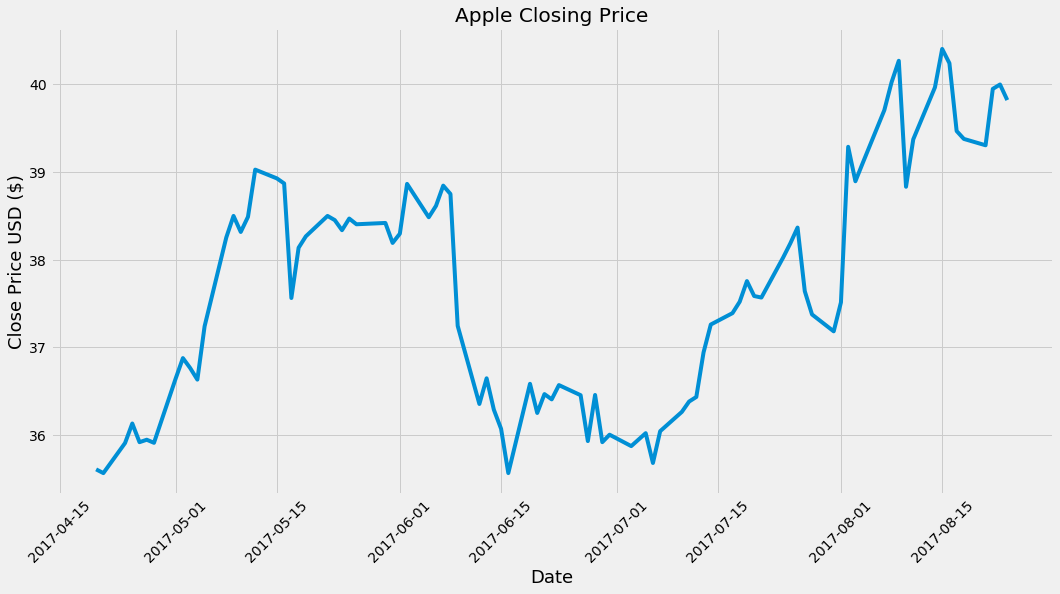

In [14]:
plt.figure(figsize=(16,8))
plt.title("Apple Closing Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price USD ($)", fontsize = 18)
plt.xticks(rotation=45)
plt.show()

In [18]:
#Calculate the MACD and signal line indicators
#Calculate the short term exponential moving average (EMA)
shortEMA = df.Close.ewm(span=12, adjust=False).mean() #Twelve periods
#Calculate the long term exponential moving average (EMA)
longEMA = df.Close.ewm(span=26, adjust=False).mean()
#Calculate the MACD line 
MACD = shortEMA - longEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

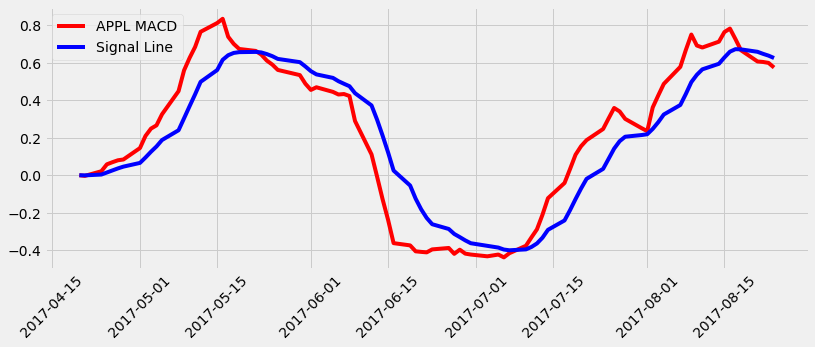

In [20]:
plt.figure(figsize = (12.2, 4.5))
plt.plot(df.index, MACD, label="APPL MACD", color = "red")
plt.plot(df.index, signal, label="Signal Line", color = "blue")
plt.legend(loc="upper left")
plt.xticks(rotation = 45)
plt.show()

In [21]:
#Create new columns for the data 
df["MACD"] = MACD
df["Signal Line"] = signal
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832,0.000000,0.000000
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736,-0.003390,-0.000678
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871,0.021314,0.003720
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794,0.058176,0.014611
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301,0.069441,0.025577
...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807,0.666326,0.670928
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856,0.606431,0.658028
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917,0.603847,0.647192


In [42]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal["MACD"][i] > signal["Signal Line"][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal["Close"][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal["MACD"][i] < signal["Signal Line"][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal["Close"][i])
                flag = 0
            else:
                Sell.append(np.nan)
                
        else: 
            Sell.append(np.nan)
            Buy.append(np.nan)
            
    return (Buy, Sell)

In [27]:
#Create a buy and sell column
a = buy_sell(df)
df["Buy_Signal_Price"] = a[0]
df["Sell_Signal_Price"] = a[1]

In [29]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832,0.000000,0.000000,NaN,NaN
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736,-0.003390,-0.000678,NaN,35.567501
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871,0.021314,0.003720,35.91,NaN
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794,0.058176,0.014611,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807,0.666326,0.670928,NaN,39.375000
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856,0.606431,0.658028,NaN,NaN
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917,0.603847,0.647192,NaN,NaN


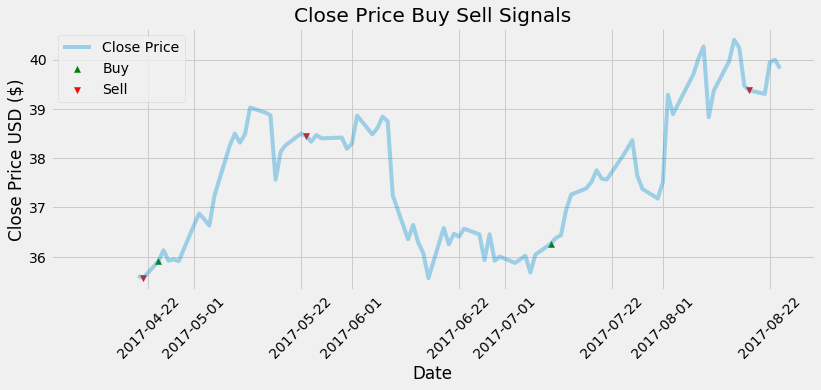

In [34]:
#Visually show the stock buy and sell signals 
plt.figure(figsize = (12.2, 4.5))
plt.scatter(df.index, df["Buy_Signal_Price"], color="green", label = "Buy", marker = "^", alpha = 1)
plt.scatter(df.index, df["Sell_Signal_Price"], color="red", label = "Sell", marker = "v", alpha = 1)
plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
plt.title("Close Price Buy Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.legend(loc = "upper left")
plt.xticks(rotation = 45)
plt.show()

In [64]:
measure = df[["Buy_Signal_Price", "Sell_Signal_Price"]]

In [54]:
measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)

<ipython-input-54-8e50993c04b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
<ipython-input-54-8e50993c04b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)


In [56]:
money = 10000
shares = 10000/df["Close"][0]
for i in range(0, (len(measure["Buy_0"] + 1))):
    #for i in range(0, 17):
    if measure["Buy_0"][i] == 0 and measure["Sell_0"][i] == 0:
        pass
    elif measure["Buy_0"][i] != 0:
        shares = money/measure["Buy_0"][i]
    elif measure["Sell_0"][i] != 0:
        money = shares*measure["Sell_0"][i]
    #We find if the last movement is a sell or a purchase
for i in range(0, (len(measure["Buy_0"] + 1))):
    if measure["Buy_0"][i] != 0:
        counter_buy = i
    if measure["Sell_0"][i] != 0:
        counter_sell = i
#We calculate the money    
if counter_sell > counter_buy:
    final_money = money
else:
    final_money = shares*(df["Close"][-1])
#We calculate the percentaje of profitability
percentage = (final_money/10000) - 1

In [57]:
percentage

0.16116841456088915

In [63]:
real_profitability = (df["Close"][-1]/df["Close"][0]) - 1 
real_profitability

0.11815502346665463

This is not optimal, the sell and buy times are not the best possible.
There are many other indicators that are useful to improve your strategy, to get a better signal, and a better understanding of the market. 

### FUNCTIONS 

In [38]:
def MACD_previous(stock, start, end):
    df = web.DataReader(stock, data_source="yahoo", start=start, end=end)
    #Calculate the MACD and signal line indicators
    #Calculate the short term exponential moving average (EMA)
    shortEMA = df.Close.ewm(span=12, adjust=False).mean() #Twelve periods
    #Calculate the long term exponential moving average (EMA)
    longEMA = df.Close.ewm(span=26, adjust=False).mean()
    #Calculate the MACD line 
    MACD = shortEMA - longEMA
    #Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()
    #Let´s plot the result
    plt.figure(figsize = (12.2, 4.5))
    plt.plot(df.index, MACD, label="APPL MACD", color = "red")
    plt.plot(df.index, signal, label="Signal Line", color = "blue")
    plt.legend(loc="upper left")
    plt.xticks(rotation = 45)
    plt.show()


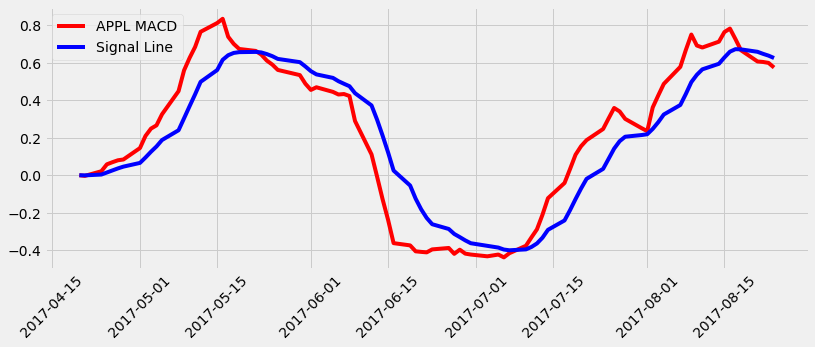

In [41]:
MACD_previous("AAPL","2017-04-20","2017-08-24")

In [47]:
def MACD(stock, start, end):
    df = web.DataReader(stock, data_source="yahoo", start=start, end=end)
    #Calculate the MACD and signal line indicators
    #Calculate the short term exponential moving average (EMA)
    shortEMA = df.Close.ewm(span=12, adjust=False).mean() #Twelve periods
    #Calculate the long term exponential moving average (EMA)
    longEMA = df.Close.ewm(span=26, adjust=False).mean()
    #Calculate the MACD line 
    MACD = shortEMA - longEMA
    #Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()
    #Create new columns for the data 
    df["MACD"] = MACD
    df["Signal Line"] = signal
    def buy_sell(signal):
        Buy = []
        Sell = []
        flag = -1

        for i in range(0, len(signal)):
            if signal["MACD"][i] > signal["Signal Line"][i]:
                Sell.append(np.nan)
                if flag != 1:
                    Buy.append(signal["Close"][i])
                    flag = 1
                else:
                    Buy.append(np.nan)
            elif signal["MACD"][i] < signal["Signal Line"][i]:
                Buy.append(np.nan)
                if flag != 0:
                    Sell.append(signal["Close"][i])
                    flag = 0
                else:
                    Sell.append(np.nan)

            else: 
                Sell.append(np.nan)
                Buy.append(np.nan)
        return (Buy, Sell)
    a = buy_sell(df)
    df["Buy_Signal_Price"] = a[0]
    df["Sell_Signal_Price"] = a[1]
    plt.figure(figsize = (12.2, 4.5))
    plt.scatter(df.index, df["Buy_Signal_Price"], color="green", label = "Buy", marker = "^", alpha = 1)
    plt.scatter(df.index, df["Sell_Signal_Price"], color="red", label = "Sell", marker = "v", alpha = 1)
    plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
    plt.title("Close Price Buy Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Close Price USD ($)")
    plt.legend(loc = "upper left")
    plt.xticks(rotation = 45)
    return plt.show()

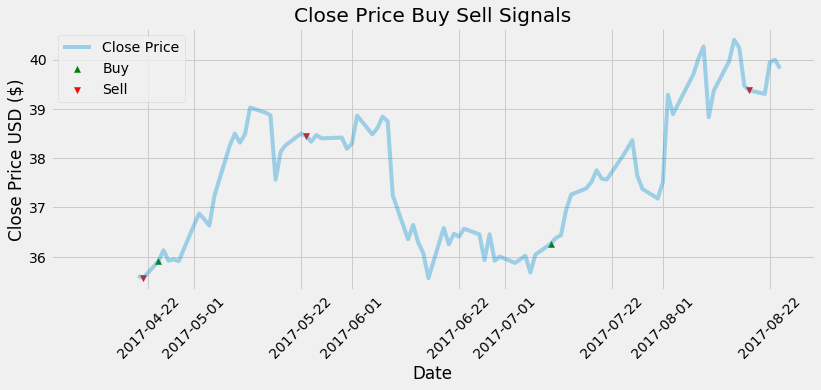

In [51]:
MACD("AAPL","2017-04-20","2017-08-24")

In [67]:
def MACD_profitability(stock, start, end):
    df = web.DataReader(stock, data_source="yahoo", start=start, end=end)
    #Calculate the MACD and signal line indicators
    #Calculate the short term exponential moving average (EMA)
    shortEMA = df.Close.ewm(span=12, adjust=False).mean() #Twelve periods
    #Calculate the long term exponential moving average (EMA)
    longEMA = df.Close.ewm(span=26, adjust=False).mean()
    #Calculate the MACD line 
    MACD = shortEMA - longEMA
    #Calculate the signal line
    signal = MACD.ewm(span=9, adjust=False).mean()
    #Create new columns for the data 
    df["MACD"] = MACD
    df["Signal Line"] = signal
    def buy_sell(signal):
        Buy = []
        Sell = []
        flag = -1

        for i in range(0, len(signal)):
            if signal["MACD"][i] > signal["Signal Line"][i]:
                Sell.append(np.nan)
                if flag != 1:
                    Buy.append(signal["Close"][i])
                    flag = 1
                else:
                    Buy.append(np.nan)
            elif signal["MACD"][i] < signal["Signal Line"][i]:
                Buy.append(np.nan)
                if flag != 0:
                    Sell.append(signal["Close"][i])
                    flag = 0
                else:
                    Sell.append(np.nan)
            else: 
                Sell.append(np.nan)
                Buy.append(np.nan)
        return (Buy, Sell)
    a = buy_sell(df)
    df["Buy_Signal_Price"] = a[0]
    df["Sell_Signal_Price"] = a[1]
    plt.figure(figsize = (12.2, 4.5))
    plt.scatter(df.index, df["Buy_Signal_Price"], color="green", label = "Buy", marker = "^", alpha = 1)
    plt.scatter(df.index, df["Sell_Signal_Price"], color="red", label = "Sell", marker = "v", alpha = 1)
    plt.plot(df["Close"], label = "Close Price", alpha = 0.35)
    plt.title("Close Price Buy Sell Signals")
    plt.xlabel("Date")
    plt.ylabel("Close Price USD ($)")
    plt.legend(loc = "upper left")
    plt.xticks(rotation = 45)
    plt.show()
    #Then we create a new dataframe to analyze this moments
    measure = df[["Buy_Signal_Price", "Sell_Signal_Price"]]
    #We substitute Nans with 0s
    measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
    measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)
    money = 10000
    shares = 10000/df["Close"][0]
    for i in range(0, (len(measure["Buy_0"] + 1))):
        #for i in range(0, 17):
        if measure["Buy_0"][i] == 0 and measure["Sell_0"][i] == 0:
            pass
        elif measure["Buy_0"][i] != 0:
            shares = money/measure["Buy_0"][i]
        elif measure["Sell_0"][i] != 0:
            money = shares*measure["Sell_0"][i]
        #We find if the last movement is a sell or a purchase
    for i in range(0, (len(measure["Buy_0"] + 1))):
        if measure["Buy_0"][i] != 0:
            counter_buy = i
        if measure["Sell_0"][i] != 0:
            counter_sell = i
    #We calculate the money    
    if counter_sell > counter_buy:
        final_money = money
    else:
        final_money = shares*(df["Close"][-1])
    #We calculate the percentaje of profitability
    percentage = (final_money/10000) - 1
    #We calculate the real profitability of the stock without using MACD
    real_profitability = (df["Close"][-1]/df["Close"][0]) - 1 
    print(percentage, real_profitability)
    return (percentage, real_profitability)

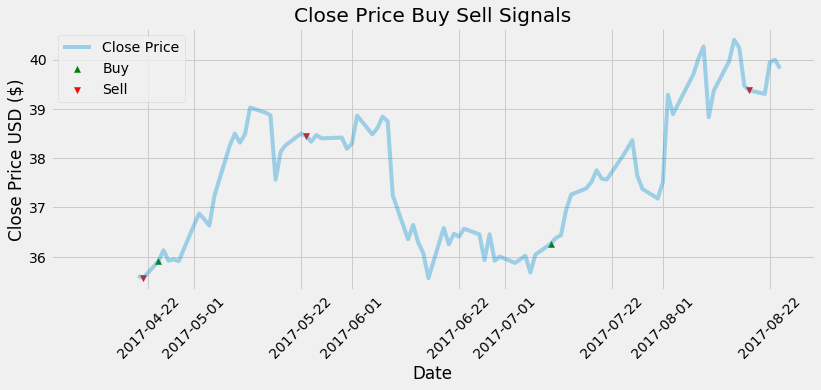

0.16116841456088915 0.11815502346665463


<ipython-input-67-12b3bc23f6d0>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Buy_0"] = measure["Buy_Signal_Price"].fillna(0)
<ipython-input-67-12b3bc23f6d0>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measure["Sell_0"] = measure["Sell_Signal_Price"]. fillna(0)


(0.16116841456088915, 0.11815502346665463)

In [69]:
MACD_profitability("AAPL","2017-04-20","2017-08-24")